<a href="https://colab.research.google.com/github/dorukanc/simulation/blob/yolo/Part_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

from google.colab import files

# Upload the Excel file
uploaded = files.upload()

Saving current-covid-patients-hospital.csv to current-covid-patients-hospital.csv


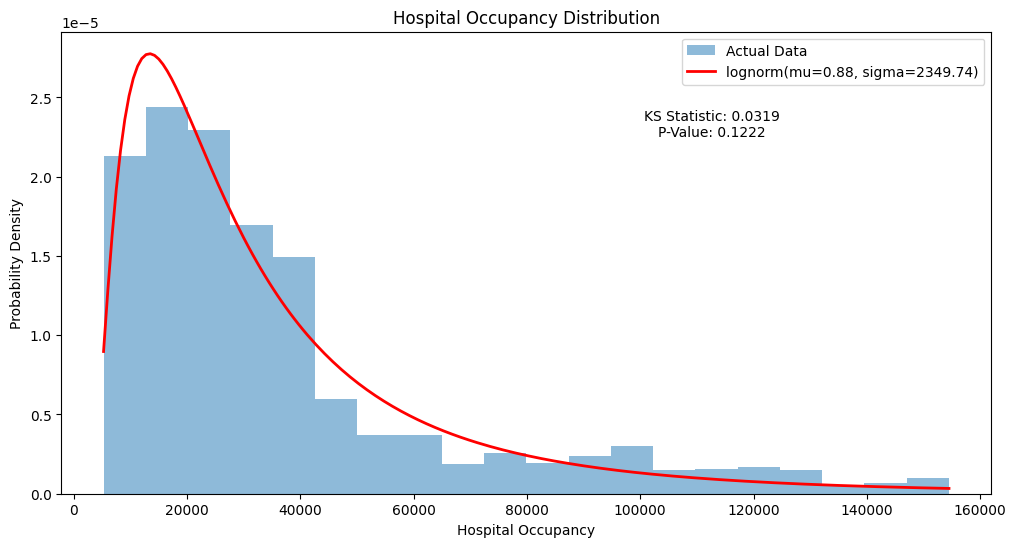

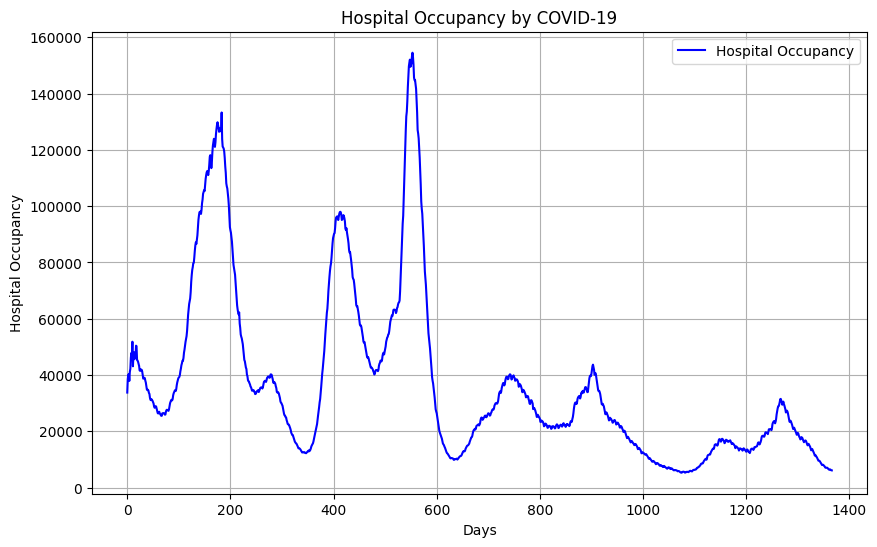

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats  # for distribution fitting

data_path = "current-covid-patients-hospital.csv"

# Read the CSV data using pandas
df = pd.read_csv(data_path)

# Extract hospital occupancy data
hospital_occupancy = df["Daily hospital occupancy"].to_numpy()

# Define candidate distributions (replace with your choices)
candidate_distributions = [stats.norm, stats.lognorm, stats.gamma]

# Fit each distribution and store results (with goodness-of-fit metric, e.g., Kolmogorov-Smirnov statistic)
distribution_results = []
for distribution in candidate_distributions:
    params = distribution.fit(hospital_occupancy)
    ks_statistic, p_value = stats.kstest(hospital_occupancy, distribution.cdf, args=params)  # Kolmogorov-Smirnov test
    distribution_results.append((distribution, params, ks_statistic, p_value))

# Choose the best-fitting distribution based on a suitable metric (e.g., lowest KS statistic)
best_distribution, best_params, best_ks_statistic, best_p_value = min(distribution_results, key=lambda x: x[2])  # Minimum KS statistic

# Generate data points for the best-fitting distribution
x_grid = np.linspace(min(hospital_occupancy), max(hospital_occupancy), 200)

# Plot the actual data, best-fitting distribution line, and other distributions (optional)
plt.figure(figsize=(12, 6))
plt.hist(hospital_occupancy, density=True, bins=20, alpha=0.5, label="Actual Data")

# Plot the best-fitting distribution line (highlighted)
pdf = best_distribution.pdf(x_grid, *best_params)
plt.plot(x_grid, pdf, label=f"{best_distribution.name}(mu={best_params[0]:.2f}, sigma={best_params[1]:.2f})", linewidth=2, color='red')  # Emphasize best fit

# Label the axes
plt.xlabel("Hospital Occupancy")
plt.ylabel("Probability Density")

# Add a title and legend
plt.title("Hospital Occupancy Distribution")
plt.legend()

# Display KS statistic and p-value for the best fit
plt.text(0.7, 0.8, f"KS Statistic: {best_ks_statistic:.4f}\nP-Value: {best_p_value:.4f}", ha='center', va='center', transform=plt.gca().transAxes)  # Positioned within the plot
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Assuming the CSV file is in the same directory
data_path = "current-covid-patients-hospital.csv"

# Read the CSV data using pandas
df = pd.read_csv(data_path)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df["Daily hospital occupancy"], label='Hospital Occupancy', color='blue')
plt.xlabel('Days')
plt.ylabel('Hospital Occupancy')
plt.title('Hospital Occupancy by COVID-19')
plt.legend()
plt.grid(True)
plt.show()



# Simulate the number of people being hospitalized each day for 100 days


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats  # for distribution fitting
import random
import matplotlib.pyplot as plt

# Assuming the CSV file is in the same directory
data_path = "current-covid-patients-hospital.csv"

# Read the CSV data using pandas
df = pd.read_csv(data_path)

# Extract hospital occupancy data
hospital_occupancy = df["Daily hospital occupancy"].to_numpy()

# Fit the lognormal distribution to the data
best_distribution = stats.lognorm
best_params = stats.lognorm.fit(hospital_occupancy)

# Simulate the number of people being hospitalized each day for 1360 days
hospitalized_daily = []
total_hospitalized = 0
for day in range(1360):
    hospitalized_today = int(best_distribution.rvs(*best_params))
    total_hospitalized += hospitalized_today
    hospitalized_daily.append(hospitalized_today)
    print(f"Day {day + 1}: {hospitalized_today} people hospitalized (Cumulative: {total_hospitalized})")

# Calculate 7-day moving average
moving_average = np.convolve(hospitalized_daily, np.ones(7)/7, mode='valid')

# Plot the 7-day moving average
plt.figure(figsize=(10, 6))
plt.plot(range(6, 1360), moving_average, label='7-day Moving Average', color='blue')
plt.xlabel('Days')
plt.ylabel('Daily Hospitalization')
plt.title('7-day Moving Average of Simulated Daily Hospitalization by COVID-19 (1360 Days)')
plt.legend()
plt.grid(True)
plt.show()


## Simulating the death of people hospitalized.

$$ \text{Estimated Deaths} = \text{Number of Hospitalized Individuals} \times \text{Mortality Rate} $$

Mortality rates for each year expressed as probabilities:

- **2020**: The probability of death if hospitalized was approximately **0.183** (or 18.3%).
- **2021**: The probability of death if hospitalized was approximately **0.2228** (or 22.28%).
- **2022**: The probability of death if hospitalized was approximately **0.1226** (or 12.26%).
- **2023**: The probability of death if hospitalized ranged from **0.001** (or 0.1%) to **0.0006** (or 0.06%).
- **2024**: The probability of death if hospitalized is not available yet, but it is expected to be lower than previous years.

To simulate the number of deaths, multiply the daily number of hospitalized individuals by the respective mortality rate for each year. Please note that these probabilities are based on past data and the actual number may vary. Always refer to the latest data for the most accurate simulations.

Simulating the number of people hospitalized and dying by COVID-19 for 1368 days:
Day 1: 18925 people hospitalized, 3463 deaths (Cumulative: 18925 hospitalized, 3463 deaths)
Day 2: 23109 people hospitalized, 4228 deaths (Cumulative: 42034 hospitalized, 7691 deaths)
Day 3: 66994 people hospitalized, 12259 deaths (Cumulative: 109028 hospitalized, 19950 deaths)
Day 4: 18948 people hospitalized, 3467 deaths (Cumulative: 127976 hospitalized, 23417 deaths)
Day 5: 9642 people hospitalized, 1764 deaths (Cumulative: 137618 hospitalized, 25181 deaths)
Day 6: 8431 people hospitalized, 1542 deaths (Cumulative: 146049 hospitalized, 26723 deaths)
Day 7: 100752 people hospitalized, 18437 deaths (Cumulative: 246801 hospitalized, 45160 deaths)
Day 8: 38661 people hospitalized, 7074 deaths (Cumulative: 285462 hospitalized, 52234 deaths)
Day 9: 43735 people hospitalized, 8003 deaths (Cumulative: 329197 hospitalized, 60237 deaths)
Day 10: 17335 people hospitalized, 3172 deaths (Cumulative: 346532 hospital

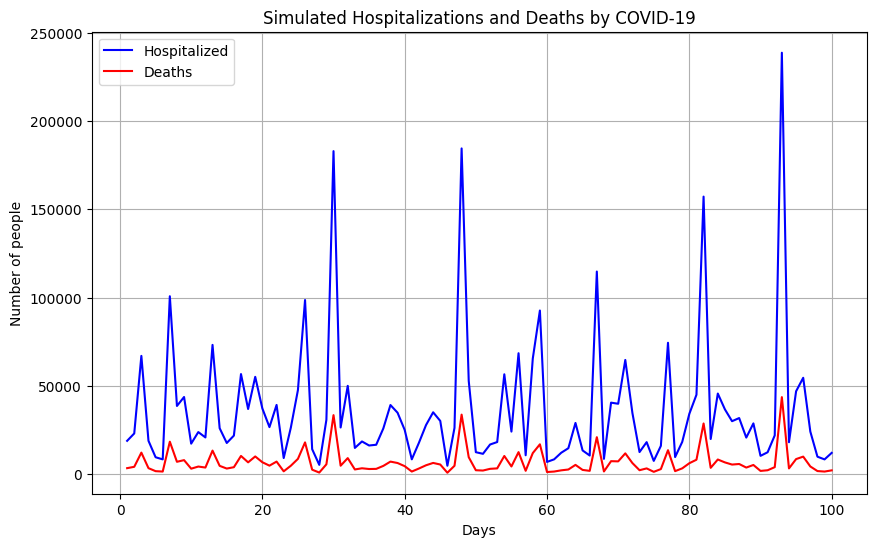

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats  # for distribution fitting
random.seed(1234)
# Assuming the CSV file is in the same directory
data_path = "current-covid-patients-hospital.csv"

# Read the CSV data using pandas
df = pd.read_csv(data_path)

# Extract hospital occupancy data
hospital_occupancy = df["Daily hospital occupancy"].to_numpy()

# Fit the lognormal distribution to the data
best_distribution = stats.lognorm
best_params = stats.lognorm.fit(hospital_occupancy)

# Simulate the number of people being hospitalized each day for 1368 days (length of the dataset)
hospitalized_cumulative = []
deaths_cumulative = []
total_hospitalized = 0
mortality_rate_2020 = 0.183
mortality_rate_2021 = 0.2228
mortality_rate_2022 = 0.1226
mortality_rate_2023 = 0.001  # Taking the lowest value
mortality_rate_2024 = 0.0006 # Taking the lowest value

# Lists to store data for plotting
hospitalized_daily = []
deaths_daily = []

print("Simulating the number of people hospitalized and dying by COVID-19 for 1368 days:")
for day in range(100):
    hospitalized_today = int(best_distribution.rvs(*best_params))

    if day < 365:  # 2020
        deaths_today = int(hospitalized_today * mortality_rate_2020)
    elif day < 365*2:  # 2021
        deaths_today = int(hospitalized_today * mortality_rate_2021)
    elif day < 365*3:  # 2022
        deaths_today = int(hospitalized_today * mortality_rate_2022)
    elif day < 365*4:  # 2023
        deaths_today = int(hospitalized_today * mortality_rate_2023)
    else:  # 2024
        deaths_today = int(hospitalized_today * mortality_rate_2024)

    total_hospitalized += hospitalized_today
    hospitalized_cumulative.append(total_hospitalized)
    deaths_cumulative.append(deaths_today)

    hospitalized_daily.append(hospitalized_today)
    deaths_daily.append(deaths_today)

    print(f"Day {day + 1}: {hospitalized_today} people hospitalized, {deaths_today} deaths (Cumulative: {total_hospitalized} hospitalized, {sum(deaths_cumulative)} deaths)")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), hospitalized_daily, label='Hospitalized', color='blue')
plt.plot(range(1, 101), deaths_daily, label='Deaths', color='red')
plt.xlabel('Days')
plt.ylabel('Number of people')
plt.title('Simulated Hospitalizations and Deaths by COVID-19')
plt.legend()
plt.grid(True)
plt.show()

